# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | kasongo-lunda
Processing Record 4 of Set 1 | ta`u
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | luganville
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | terenos
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | raton
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | vallenar
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | pu

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lon           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,279.02,88,100,6.48,TF,1712890947
1,fale old settlement,-9.3852,-171.2468,303.29,70,56,3.64,TK,1712890948
2,kasongo-lunda,-6.4667,16.8167,295.35,98,100,0.26,CD,1712890938
3,ta`u,-14.2336,-169.5144,302.24,76,51,4.86,AS,1712890948
4,adamstown,-25.0660,-130.1015,294.98,55,29,6.78,PN,1712890948


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.02,88,100,6.48,TF,1712890947
1,fale old settlement,-9.3852,-171.2468,303.29,70,56,3.64,TK,1712890948
2,kasongo-lunda,-6.4667,16.8167,295.35,98,100,0.26,CD,1712890938
3,ta`u,-14.2336,-169.5144,302.24,76,51,4.86,AS,1712890948
4,adamstown,-25.0660,-130.1015,294.98,55,29,6.78,PN,1712890948


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

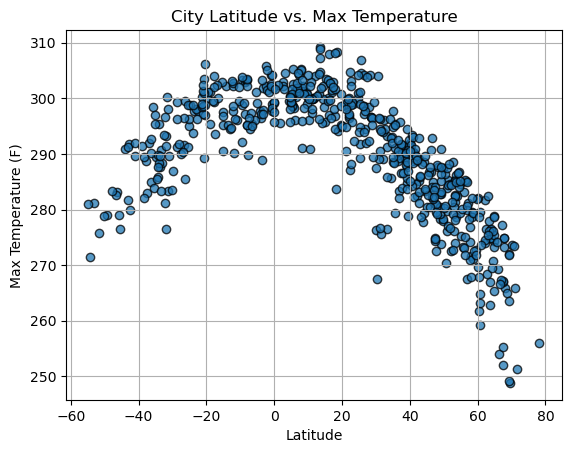

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

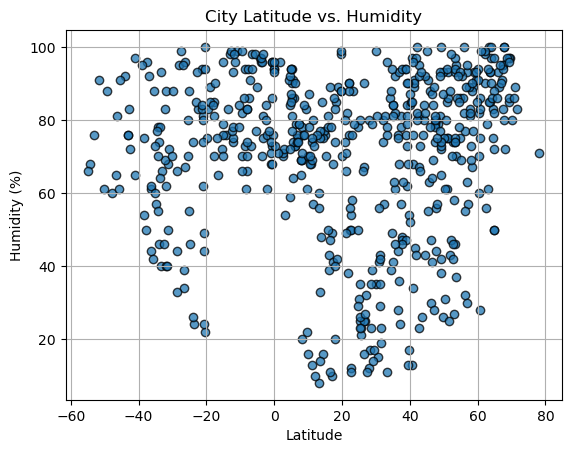

In [31]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

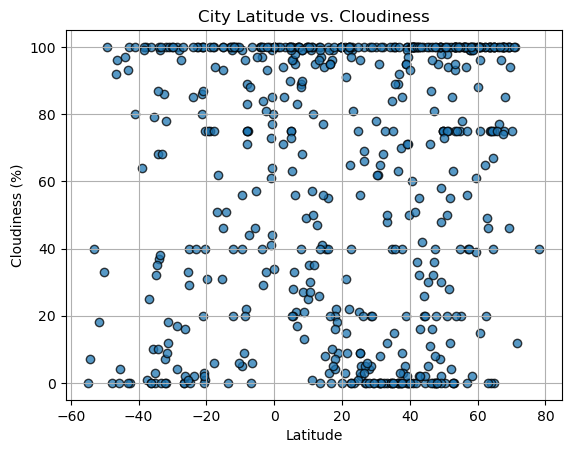

In [32]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

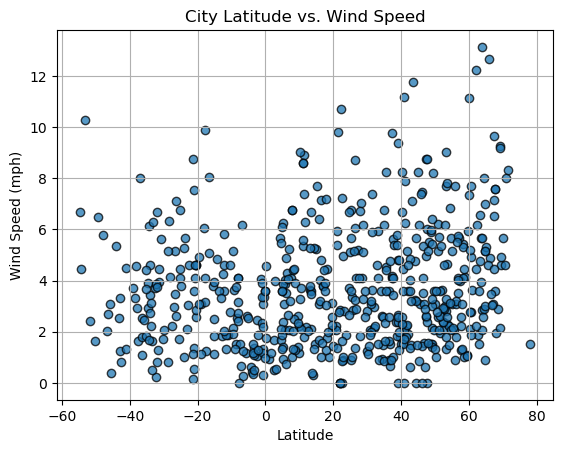

In [33]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
import scipy.stats as st

def plot_linear_regression(x, y, title):
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x, y)
    plt.plot(x, regress_values, color='red')
    
    plt.annotate(line_eq, (x.min(), y.max()), color='red', fontsize=12, ha='left')
    plt.annotate(f"rvalue = {rvalue:.2f}", (x.min(), y.max() - 10), color='red', fontsize=12, ha='left')
    
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,talnakh,69.4865,88.3972,248.82,97,94,4.62,RU,1712890808
6,stanley,54.8680,-1.6985,284.66,86,75,5.66,GB,1712890941
9,klaksvik,62.2266,-6.5890,281.66,90,65,12.22,FO,1712890948
10,enewetak,11.3474,162.3373,299.99,80,80,8.92,MH,1712890657
11,iqaluit,63.7506,-68.5145,267.00,85,75,5.66,CA,1712890876


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.02,88,100,6.48,TF,1712890947
1,fale old settlement,-9.3852,-171.2468,303.29,70,56,3.64,TK,1712890948
2,kasongo-lunda,-6.4667,16.8167,295.35,98,100,0.26,CD,1712890938
3,ta`u,-14.2336,-169.5144,302.24,76,51,4.86,AS,1712890948
4,adamstown,-25.0660,-130.1015,294.98,55,29,6.78,PN,1712890948


###  Temperature vs. Latitude Linear Regression Plot

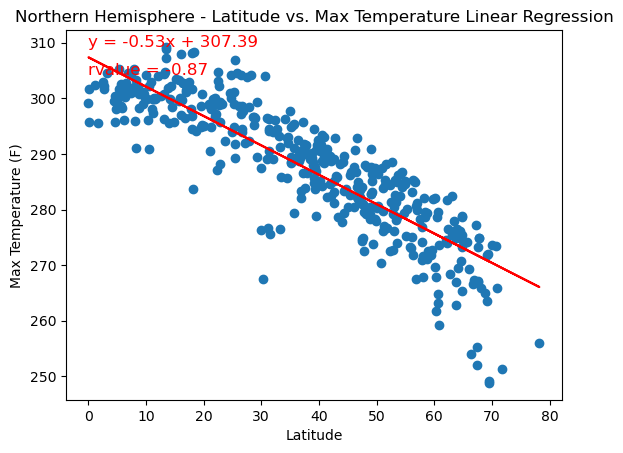

In [37]:
# Linear regression on Northern Hemisphere
# Select X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 5), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs. Max Temperature Linear Regression")

# Show plot
plt.show()

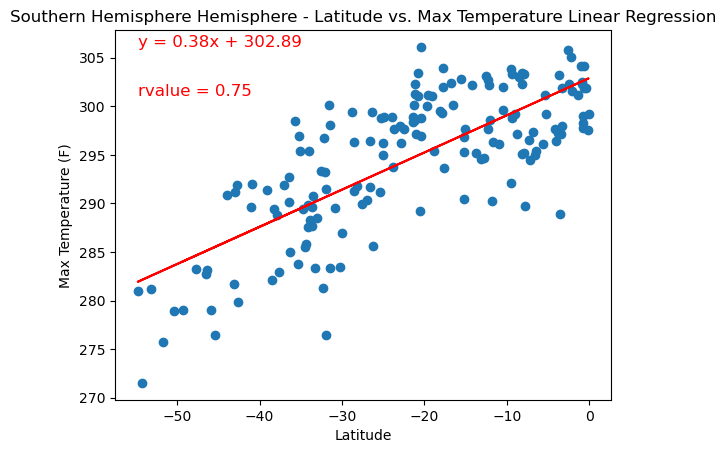

In [38]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Select X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 5), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere Hemisphere - Latitude vs. Max Temperature Linear Regression")

# Show plot
plt.show()

**Discussion about the linear relationship:** The analysis shows that the closer the location is to the equator (i.e., Lat = 0), the higher the maximum temperate tends to be both for the Northern Hemisphere and the Southern Hemisphere. The Northern hemisphere shows a negative relationship, as the latitude increases from 0 to 80, with 80 being the furthest from the equator and thereby showing cooler maximum temperatures. In comparison, the Southern Hemisphere shows a positive relationshp as the latitude begins at -50 and as the locations become closer to the equator (i.e., moving closer to 0), the maximum temperature increases. Additionally, the rvalues being -0.88 and 0.73 for the Northern and Southern Hemispheres, respectively, indicates the correlation is strong and likely valid. 

### Humidity vs. Latitude Linear Regression Plot

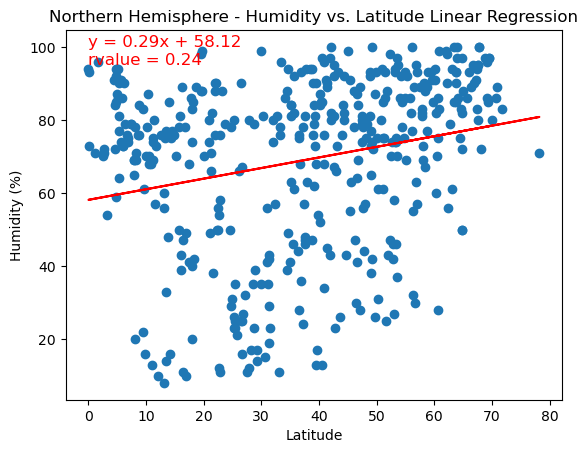

In [39]:
# Northern Hemisphere Humidity vs. Latitude 
# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Select X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 5), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Show plot
plt.show()

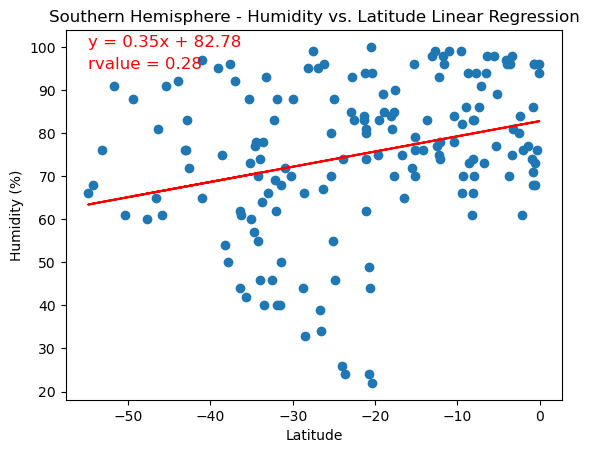

In [40]:
# Southern Hemisphere
# Filter data for the Northern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Select X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 5), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both the Southern Hemisphere and Northern Hemisphere show a positive relationship. In the Southern Hemisphere, the closer the location is to the equater (i.e. Lat = 0), the higher chance of high humidity. However, in the Northern Hemisphere, the futher the lcoation is from the equator, the higher chance of high humidity. However, if you look at both scatter plots, there seems to be many outliers thereby decreasing quality of the linear relationship, further data collection and/or data cleansing may need to occcur to determine correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

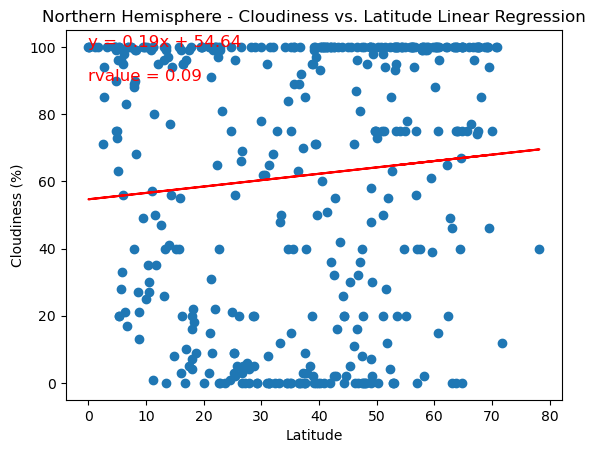

In [41]:
# Northern Hemisphere
# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Select X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 10), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Show plot
plt.show()


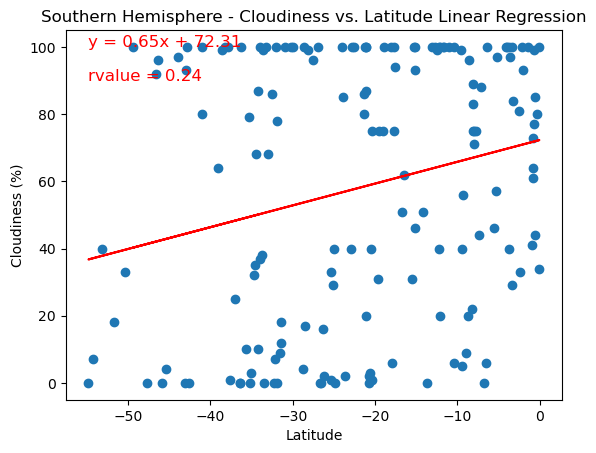

In [42]:
# Southern Hemisphere
# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Select X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 10), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Show plot
plt.show()

**Discussion about the linear relationship:* Both the Northern Hemisphere and Souther Hemisphere show a positive relationship between cloudiness and latitude, however, given the rvalue <= 0.3 for both indicates weak correlation, particularly for the Northern Hemisphere. It would be difficult to strongly suggest a correlation given current dataset. 

### Wind Speed vs. Latitude Linear Regression Plot

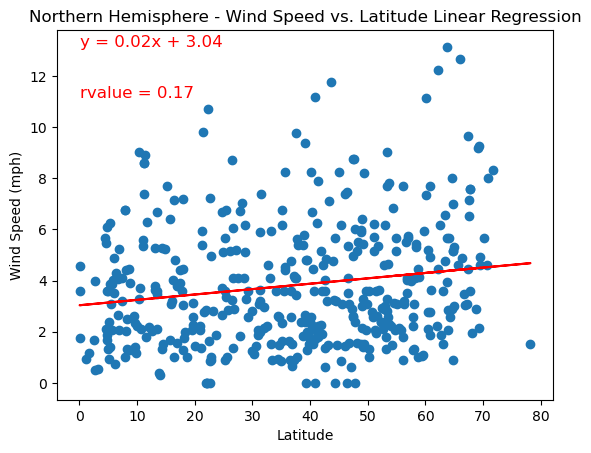

In [43]:
# Northern Hemisphere
# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Select X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 2), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Show plot
plt.show()


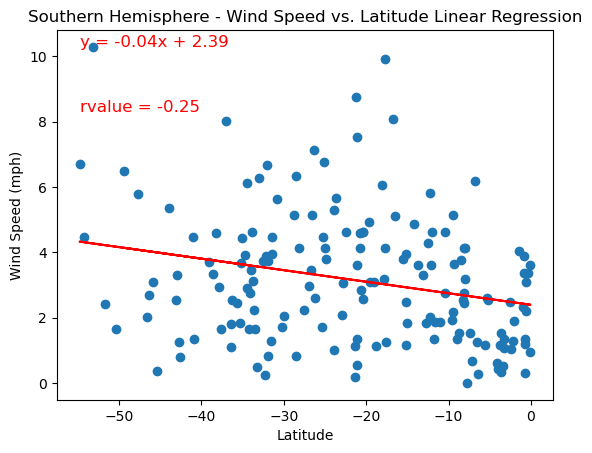

In [44]:
# Southern Hemisphere
# Filter data for the Northern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Select X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Annotate the regression line equation and correlation coefficient
plt.annotate(line_eq, (x_values.min(), y_values.max()), color='red', fontsize=12, ha='left')
plt.annotate(f"rvalue = {rvalue:.2f}", (x_values.min(), y_values.max() - 2), color='red', fontsize=12, ha='left')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Show plot
plt.show()


**Discussion about the linear relationship:** The Northern Hemisphere shows a positive relationship, while the Southern Hemisphere shows a negative relationship when comparing wind speed to latitude. However, the rvalues indicate this is a rather weak correlation and likely needs more data and/or cleansing. 